In [ ]:
'''
Advanced 1 File  Download Advanced 1 File25%
Use the loan default data set Download loan default data setfor the Advanced 1 program.  Be sure to write the user's filtered data to a .csv file in your code. 
'''


Enter the beginning date between 2023-08-18 and 2025-08-15: 2023-08-20
Enter the ending date between 2023-08-18 and 2025-08-15: 2024-01-01






 Summary of stock prices from 2023-08-20 to 2024-01-01

        Beginning Price  Ending Price  Minimum  Maximum  Average
Ticker                                                          
[LDOS]            96.47        108.24    90.45   111.30    99.69
[LHX]            180.92        210.62   161.28   210.92   183.46
[NOC]            433.69        468.14   420.07   490.76   457.18


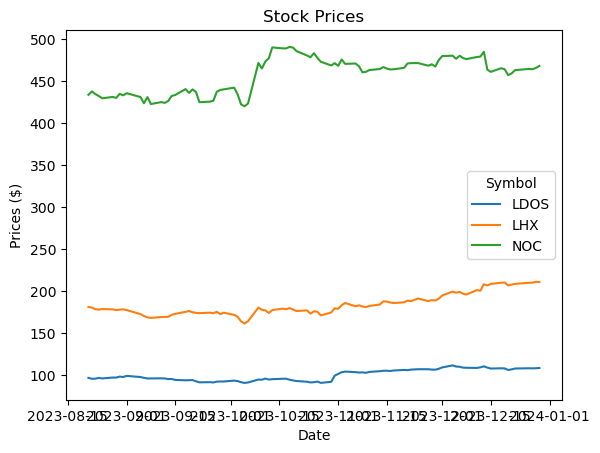

In [52]:
'''
Advanced 2 25%  Refer to Class 11 Notes  for Google Sheet Download Download Refer to Class 11 Notes  
for Google Sheet Download 

Download the historical price data for three separate stocks over at least one year's time. 

Ask the use to input date range. Return  a dataframe to the user with the high, low, minimum, maximum 
and average price of the each stock over the selected time period. These figures must be calculated in 
the python code. Also return a line graph with the daily close price for each stock over the selected 
date range.  Include user validation as shown in output. Pay attention to formatting of the input and outputs.

Note: the stock names can be hard written into the code, but the program should be flexible enough to 
handle any date range of the csv file downloaded from Google Sheets. So for example, if user downloads data 
for the stocks from 2017-01-01 to 2018-01-01, then the first prompt ("Enter the beginning date between...") 
should reflect this date range.  The python program should run for any set of files, as long as the names 
are consistent with what is in the program and the format is consistent with the Google price downloads. 
Include your three .csv files with your submission. 

'''

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


ticker_list = ["LHX", "LDOS", "NOC"]
file_list = ["LHX_hist_prices.csv", "LDOS_hist_prices.csv", "NOC_hist_prices.csv"]
file_dict = {}

for ticker in ticker_list:
    file_dict[ticker] = file_list[ticker_list.index(ticker)] 


beg_date = ""
end_date = ""
start_date_limit = "2017-08-18"
end_date_limit =  "2018-08-17"


######################################################################################

def date_str_to_datetime(date_input):
    from datetime import datetime
    dt_date = datetime.strptime(date_input, "%Y-%m-%d").date()   # ←-- had to look up this function for datatime, annoying to find it.
    return(dt_date)

######################################################################################

def date_range_prompt(start_date_limit, end_date_limit): 
    try:
        dt_start_d_l = date_str_to_datetime(start_date_limit)
        dt_end_d_l = date_str_to_datetime(end_date_limit)
    except:
        dt_start_d_l = start_date_limit
        dt_end_d_l = end_date_limit
    while True:
        try:
            date_input = input("Enter the beginning date between {0:} and {1:}:".format(start_date_limit, end_date_limit))
            beg_dt_date = date_str_to_datetime(date_input)
            if( (beg_dt_date < dt_start_d_l) or (beg_dt_date > dt_end_d_l) ):
                raise ValueError
            elif( (beg_dt_date >= dt_start_d_l) or (beg_dt_date < dt_end_d_l) ): 
                break
        except ValueError:
            print("Start date is out of the date range\n")
    while True:
        try:
            date_input = input("Enter the ending date between {0:} and {1:}:".format(start_date_limit, end_date_limit))
            end_dt_date = date_str_to_datetime(date_input)
            if( (end_dt_date == beg_dt_date ) or (end_dt_date < beg_dt_date)):
                raise TypeError
            elif( (end_dt_date < dt_start_d_l) or (end_dt_date > dt_end_d_l) ):
                raise ValueError
            elif( (end_dt_date > dt_start_d_l) or (end_dt_date < dt_end_d_l) ): 
                break
        except ValueError:
            print("End date is out of date range\n")
        except TypeError:
            print("End date cannot be before start date\n")
    return[beg_dt_date, end_dt_date]
    
######################################################################################

main_df = []



# ------------------- Opening the files of each stock's historical prices downloaded, then concatenates them into one large DataFrame. -------------------
for ticker in ticker_list:
    opened_csv_file = pd.read_csv(file_dict[ticker])
    opened_csv_file["Ticker"] = ticker
    main_df.append(opened_csv_file)
main_df = pd.concat(main_df)
main_df['Date'].sort_values(ascending=False)
sorted_dates = main_df['Date'].sort_values(ascending=False)

main_df['Date'] = pd.to_datetime(main_df['Date'])
main_df['Date'] = main_df['Date'].dt.date
sorted_df = main_df.sort_values(by='Date')

beg_date_df = sorted_df['Date'].min() 
end_date_df = sorted_df['Date'].max() 

beg_end_date_list = date_range_prompt(beg_date_df, end_date_df)
beg_date = beg_end_date_list[0]
end_date = beg_end_date_list[1]

# Remove rows outside of the entered beginning and ending dates. 
sorted_df = sorted_df[(sorted_df['Date'] >= beg_date) & (sorted_df['Date'] <= end_date)]

# Calculation of each stocks' ~metrics~
ticker_df = sorted_df.groupby('Ticker')['Ticker'].unique()
beg_price = sorted_df.groupby('Ticker')['Close'].first().rename('Beginning Price').round(2)
end_price = sorted_df.groupby('Ticker')['Close'].last().rename('Ending Price').round(2)
min_df = sorted_df.groupby('Ticker')['Close'].min().rename('Minimum').round(2)
max_df = sorted_df.groupby('Ticker')['Close'].max().rename('Maximum').round(2)
avg_df = sorted_df.groupby('Ticker')['Close'].mean().rename('Average').round(2)

sorted_df.set_index('Date', inplace=True)

ticker_list = list(ticker_df)
results_df = pd.DataFrame(
    {"Beginning Price": beg_price,
    "Ending Price": end_price,
    "Minimum": min_df, 
    "Maximum": max_df,
    "Average": avg_df},
    index= ticker_df)

print("\n"*4, "Summary of stock prices from {0:} to {1:}\n".format(beg_date, end_date))
print(results_df)


# --------------- Start to create and then show display the graph made -------------------
fig, axes1 = plt.subplots()

for ticker, individual_df in sorted_df.groupby('Ticker'):
    axes1.plot(individual_df.index, individual_df['Close'], label=ticker)

axes1.set_xlabel('Date')
axes1.set_ylabel('Prices ($)')
axes1.set_title('Stock Prices')
axes1.legend(title="Symbol")
plt.show()